### Notebook to plot all the necessary descriptives in time

### TODO: Check the names of pdf files

In [1]:
%matplotlib inline
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import datetime as dt
import time
from importlib import reload

In [2]:
summary_descriptives = pd.read_csv('C:/Users/Tesista/Desktop/Evasion/01_analisis/03_datos/05_SUMMARY/DescriptivesSummary.csv', sep=';', encoding = 'latin-1')
#summary_descriptives = pd.read_csv('C:/Users/leoca_000/Desktop/Evasion/01_analisis/03_datos/05_SUMMARY/DescriptivesSummary.csv', sep=';', encoding = 'latin-1')

In [3]:
for i in range(len(summary_descriptives.index)):
    summary_descriptives.at[i, 'date'] = dt.datetime.strptime(summary_descriptives.at[i, 'date'], "%Y-%m-%d").date()

summary_descriptives['mean_difference'] =  summary_descriptives['turnstile_means']-summary_descriptives['no_turnstile_means']

* Filtering to new ddffs:
1. dates -> clean_dates
2. clean_dates -> clean_week_dates
3. clean_week_dates -> clean_working_dates

In [4]:
outlier_1 = dt.date(2017,4,10)
outlier_2 = dt.date(2017,4,17)

weekend = set([5, 6])

viernes_santo = dt.date(2017,4,14) #Friday
censo_abreviado = dt.date(2017,4,19) #Wednesday
dia_trabajo = dt.date(2017,5,1) #Monday
san_pedro = dt.date(2017,6,26) #Monday
asuncion_virgen = dt.date(2017,8,15) #Tuesday

special_dates = {viernes_santo,censo_abreviado,dia_trabajo,san_pedro,asuncion_virgen}

In [5]:
tmp_descriptives = summary_descriptives[(summary_descriptives['date']!=outlier_2)]

In [6]:
clean_summary = summary_descriptives[(summary_descriptives['date']!=outlier_1)&(summary_descriptives['date']!=outlier_2)]

In [7]:
clean_week_summary = pd.DataFrame(columns=summary_descriptives.columns)

for index, row in clean_summary.iterrows():
    if row['date'].weekday() not in weekend:
        clean_week_summary.loc[index] = row
        

In [8]:
clean_working_summary = pd.DataFrame(columns=summary_descriptives.columns)

for index, row in clean_week_summary.iterrows():
    if row['date'] not in special_dates:
        clean_working_summary.loc[index] = row
  

### MEANS EVOLUTION

In [9]:
colors = [(85,98,112),(78,205,196),(199,244,100),(255,107,107),(196,77,88)]
for i in range(len(colors)):
    r, g, b = colors[i]  
    colors[i] = (r / 255., g / 255., b / 255.)

* Raw data

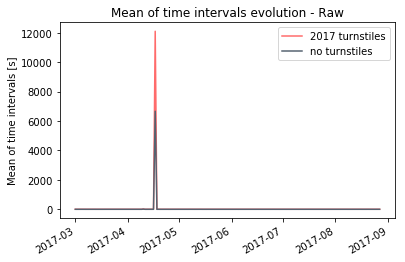

In [10]:
fig_0, ax_0 = plt.subplots()

ax_0.plot(summary_descriptives['date'],summary_descriptives['turnstile_means'], color = colors [3], label='2017 turnstiles')
ax_0.plot(summary_descriptives['date'],summary_descriptives['no_turnstile_means'], color = colors [0], label='no turnstiles')

fig_0.autofmt_xdate()
ax_0.legend()

ax_0.set_title('Mean of time intervals evolution - Raw')
ax_0.set_ylabel('Mean of time intervals [s]')

#plt.savefig('C:/Users/Tesista/Desktop/Evasion/03_report/02_Figs/7_meansRawEvolutionInTime.pdf')

* Temporal data

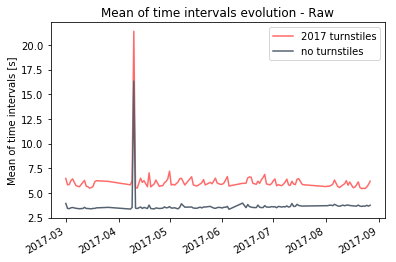

In [11]:
fig_01, ax_01 = plt.subplots()

ax_01.plot(tmp_descriptives['date'],tmp_descriptives['turnstile_means'], color = colors [3], label='2017 turnstiles')
ax_01.plot(tmp_descriptives['date'],tmp_descriptives['no_turnstile_means'], color = colors [0], label='no turnstiles')

fig_01.autofmt_xdate()
ax_01.legend()

ax_01.set_title('Mean of time intervals evolution - Raw')
ax_01.set_ylabel('Mean of time intervals [s]')

#plt.savefig('C:/Users/Tesista/Desktop/Evasion/03_report/02_Figs/7_meansRawTemporalEvolutionInTime.pdf')

* Clean data

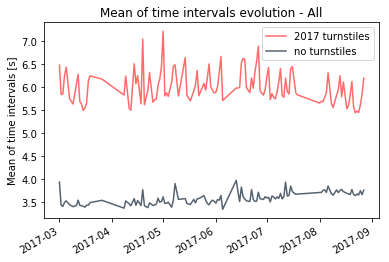

In [12]:
fig_1, ax_1 = plt.subplots()

ax_1.plot(clean_summary['date'],clean_summary['turnstile_means'], color = colors [3], label='2017 turnstiles')
ax_1.plot(clean_summary['date'],clean_summary['no_turnstile_means'], color = colors [0], label='no turnstiles')

fig_1.autofmt_xdate()
ax_1.legend()

ax_1.set_title('Mean of time intervals evolution - All')
ax_1.set_ylabel('Mean of time intervals [s]')

#plt.savefig('C:/Users/Tesista/Desktop/Evasion/03_report/02_Figs/7_meansEvolutionInTime.pdf')

* Week data

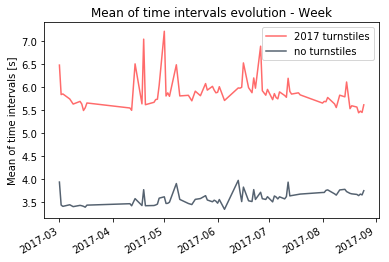

In [13]:
fig_2, ax_2 = plt.subplots()

ax_2.plot(clean_week_summary['date'],clean_week_summary['turnstile_means'], color = colors [3], label='2017 turnstiles')
ax_2.plot(clean_week_summary['date'],clean_week_summary['no_turnstile_means'],color = colors [0], label='no turnstiles')

fig_2.autofmt_xdate()
ax_2.legend()

ax_2.set_title('Mean of time intervals evolution - Week')
ax_2.set_ylabel('Mean of time intervals [s]')

#plt.savefig('C:/Users/Tesista/Desktop/Evasion/03_report/02_Figs/7_meansWeekEvolutionInTime.pdf')

* Working data

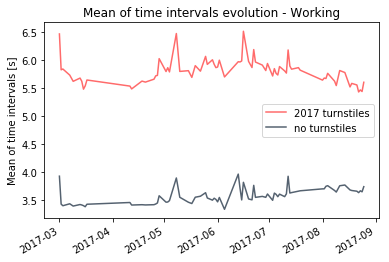

In [14]:
fig_3, ax_3 = plt.subplots()

ax_3.plot(clean_working_summary['date'],clean_working_summary['turnstile_means'],color = colors [3], label='2017 turnstiles')
ax_3.plot(clean_working_summary['date'],clean_working_summary['no_turnstile_means'],color = colors [0], label='no turnstiles')

fig_3.autofmt_xdate()
ax_3.legend()

ax_3.set_title('Mean of time intervals evolution - Working')
ax_3.set_ylabel('Mean of time intervals [s]')

#plt.savefig('C:/Users/Tesista/Desktop/Evasion/03_report/02_Figs/7_meansWorkingEvolutionInTime.pdf')

In [15]:
clean_working_summary['turnstile_means'].min()

5.4374736277755984

In [16]:
clean_working_summary['turnstile_means'].max()

6.5212608909601411

In [17]:
clean_working_summary['no_turnstile_means'].min()

3.3413016231121135

In [18]:
clean_working_summary['no_turnstile_means'].max()

3.9699050696828921

* Plotting differences in working days

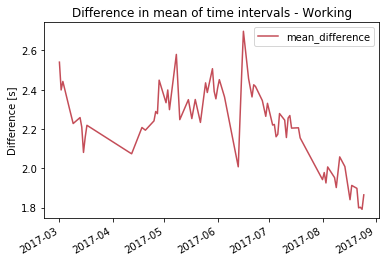

In [19]:
fig_4, ax_4 = plt.subplots()

ax_4.plot(clean_working_summary['date'],clean_working_summary['mean_difference'],color = colors [4])

fig_4.autofmt_xdate()
ax_4.legend()

ax_4.set_title('Difference in mean of time intervals - Working')
ax_4.set_ylabel('Difference [s]')

#plt.savefig('C:/Users/Tesista/Desktop/Evasion/03_report/02_Figs/7_differencesMeansWorkingEvolutionInTime.pdf')

In [20]:
clean_working_summary[clean_working_summary['mean_difference']==clean_working_summary['mean_difference'].max()]

,Unnamed: 0,date,total_raw_trx,total_trx,total_turns_trx,total_no_turns_trx,turnstile_obs,turnstile_means,turnstile_stds,turnstile_medians,turnstile_maxs,no_turnstile_obs,no_turnstile_means,no_turnstile_stds,no_turnstile_medians,no_turnstile_maxs,mean_difference
67,67,2017-06-16,2179827,2137149,220315,1491192,138188,6.521261,4.780132,5.0,31.0,909660,3.823414,4.076901,3.0,28.0,2.697847


### STDS EVOLUTION

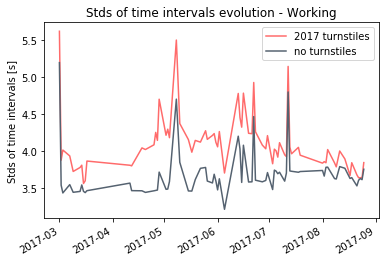

In [21]:
fig_6, ax_6 = plt.subplots()

ax_6.plot(clean_working_summary['date'],clean_working_summary['turnstile_stds'],color = colors [3], label='2017 turnstiles')
ax_6.plot(clean_working_summary['date'],clean_working_summary['no_turnstile_stds'],color = colors [0], label='no turnstiles')

fig_6.autofmt_xdate()
ax_6.legend()

ax_6.set_title('Stds of time intervals evolution - Working')
ax_6.set_ylabel('Stds of time intervals [s]')

#plt.savefig('C:/Users/Tesista/Desktop/Evasion/03_report/02_Figs/7_stdsWorkingEvolutionInTime.pdf')

### MEDIANS EVOLUTION

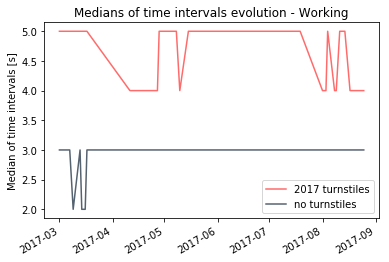

In [22]:
fig_7, ax_7 = plt.subplots()

ax_7.plot(clean_working_summary['date'],clean_working_summary['turnstile_medians'],color = colors [3], label='2017 turnstiles')
ax_7.plot(clean_working_summary['date'],clean_working_summary['no_turnstile_medians'],color = colors [0], label='no turnstiles')

fig_7.autofmt_xdate()
ax_7.legend()

ax_7.set_title('Medians of time intervals evolution - Working')
ax_7.set_ylabel('Median of time intervals [s]')

#plt.savefig('C:/Users/Tesista/Desktop/Evasion/03_report/02_Figs/7_mediansWorkingEvolutionInTime.pdf')

### MAXS EVOLUTION

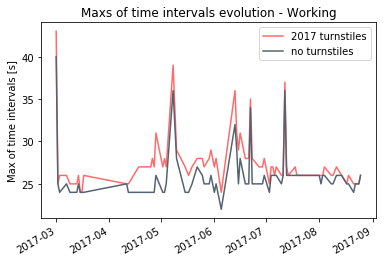

In [23]:
fig_5, ax_5 = plt.subplots()

ax_5.plot(clean_working_summary['date'],clean_working_summary['turnstile_maxs'],color = colors [3], label='2017 turnstiles')
ax_5.plot(clean_working_summary['date'],clean_working_summary['no_turnstile_maxs'],color = colors [0], label='no turnstiles')

fig_5.autofmt_xdate()
ax_5.legend()

ax_5.set_title('Maxs of time intervals evolution - Working')
ax_5.set_ylabel('Max of time intervals [s]')

#plt.savefig('C:/Users/Tesista/Desktop/Evasion/03_report/02_Figs/7_maxsWorkingEvolutionInTime.pdf')

### Transactions

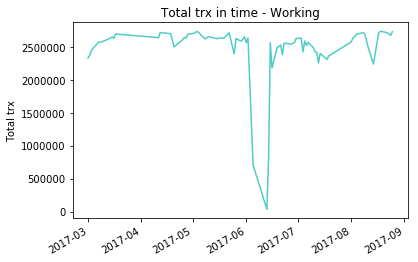

In [24]:
fig_8, ax_8 = plt.subplots()

ax_8.plot(clean_working_summary['date'],clean_working_summary['total_raw_trx'], color = colors[1], label='working - total-trx')

fig_8.autofmt_xdate()
ax_8.set_title('Total trx in time - Working')
ax_8.set_ylabel('Total trx')

#plt.savefig('C:/Users/Tesista/Desktop/Evasion/03_report/02_Figs/7_trxWorkingInTime.pdf')

In [25]:
clean_working_summary.loc['63':'64']

,Unnamed: 0,date,total_raw_trx,total_trx,total_turns_trx,total_no_turns_trx,turnstile_obs,turnstile_means,turnstile_stds,turnstile_medians,turnstile_maxs,no_turnstile_obs,no_turnstile_means,no_turnstile_stds,no_turnstile_medians,no_turnstile_maxs,mean_difference
63,63,2017-06-05,704132,693440,56391,501021,37018,5.705089,3.701499,5.0,24.0,319140,3.341302,3.211390,3.0,22.0,2.363788
64,64,2017-06-13,33896,32984,11023,16473,6811,5.977536,4.775758,5.0,36.0,9902,3.969905,4.198646,3.0,32.0,2.007631


### Closed